In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
data_visualize = pd.read_csv("noAirTemp_pd.csv")

data_visualize

,DAT,WL_Flume (m3/hour),WL_Flume_OUT (m3/hour),Solar (W/m2),Precipitation (mm),WindSpeed (m/s),RH (%),delta PD (mm)
0,164.791667,0.024406,0.156048,42,0.000,1.23,84.90,-0.1
1,164.833333,0.031719,0.136486,4,0.000,0.79,88.40,-0.1
2,164.875000,0.031719,0.136486,0,0.000,0.60,90.50,-0.1
3,164.916667,0.031719,0.060883,0,0.000,0.48,91.50,-0.1
4,164.958333,0.040201,0.049905,0,1.766,0.72,92.40,0.2
...,...,...,...,...,...,...,...,...
2442,267.250000,0.000000,0.000000,0,0.000,0.81,101.16,-0.1
2443,267.291667,0.000000,0.000000,12,0.000,0.76,101.20,0.0
2444,267.333333,0.000000,0.000000,82,0.017,0.88,101.22,0.0
2445,267.375000,0.000000,0.000000,195,0.000,0.76,101.22,0.0


In [3]:
data = np.loadtxt("noAirTemp_np.csv", delimiter = ',', dtype = np.float32)

X_COL = len(data_visualize.columns) - 1

x = data[:, :X_COL]
y = data[:, [-1]].ravel()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [4]:
#### LINEAR MODEL ####

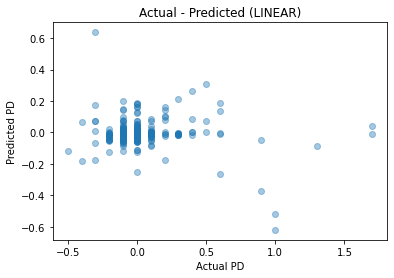

In [5]:
SupportVectorRegModel_linear = SVR(kernel = 'linear', C = .1, gamma = 'auto', epsilon = .001)
SupportVectorRegModel_linear.fit(x_train, y_train)

y_hat_linear = SupportVectorRegModel_linear.predict(x_test)

plt.scatter(y_test, y_hat_linear, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Actual - Predicted (LINEAR)')
plt.show()

In [6]:
mse = mean_squared_error(y_test, y_hat_linear)
rmse = np.sqrt(mse)
mean_absolute_error(y_test, y_hat_linear)

print("LINEAR RMSE:", rmse)
print("LINEAR MAE:", mean_absolute_error(y_test, y_hat_linear))

LINEAR RMSE: 0.19953531893729035
LINEAR MAE: 0.08881149114161314


In [7]:
#### RBF MODEL ####

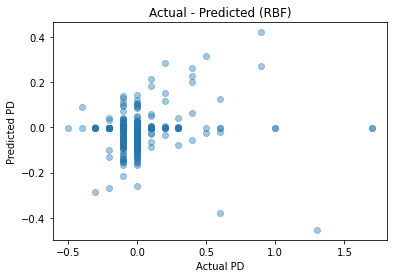

In [8]:
SupportVectorRegModel_rbf = SVR(kernel = 'rbf', C = 1, gamma = 'auto', epsilon = .001)
SupportVectorRegModel_rbf.fit(x_train, y_train)

y_hat_rbf = SupportVectorRegModel_rbf.predict(x_test)

plt.scatter(y_test, y_hat_rbf, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Actual - Predicted (RBF)')
plt.show()

In [9]:
mse = mean_squared_error(y_test, y_hat_rbf)
rmse = np.sqrt(mse)
mean_absolute_error(y_test, y_hat_rbf)

print("RBF RMSE:", rmse)
print("RBF MAE:", mean_absolute_error(y_test, y_hat_rbf))

RBF RMSE: 0.18398945612924408
RBF MAE: 0.08782845881295853
